В этом ноутбуке я демонстрирую свои навыки работы с датафремом - генерация, преобразования, вычисления.

In [84]:
import random
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

### Часть 1
Генерируем датафрейм из синтетических данных.

In [28]:
sample="1234567890abcdefghijk"
user_id=[''.join(random.sample(sample,15)) for i in range(1000)]

In [26]:
order_number=[random.randint(1,10) for i in range(1000)]

In [31]:
click2delivery=ss.norm.rvs(loc=1440, scale=200, size=1000)

In [79]:
l=1
order_items_sum=ss.expon.rvs(loc=1, scale=1/l, size=1000)

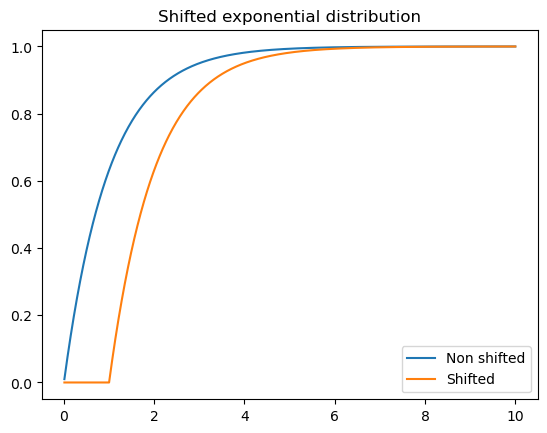

In [80]:
#Смещенное экспоненциальное распределение
x=np.linspace(0.01, 10, 1000)

cdf=ss.expon.cdf(x,loc=0)
cdf2=ss.expon.cdf(x,loc=1)

plt.plot(x,cdf, label='Non shifted')
plt.plot(x,cdf2, label='Shifted')
plt.title('Shifted exponential distribution')
plt.legend()
plt.show()

In [83]:
retention=

SyntaxError: invalid syntax (2190018652.py, line 1)

In [85]:
df=pd.DataFrame({
                    'user_id':user_id,
                    'order_number':order_number,
                    'click2delivery':click2delivery,
                    'order_items_sum':order_items_sum
    
                })

In [87]:
df.head()

,user_id,order_number,click2delivery,order_items_sum
0,j48be321ic5769f,9,1552.494797,1.199621
1,e65kigacjf97413,2,1647.209819,2.570645
2,gkfd984bi7h1ja3,6,1305.776219,3.147539
3,bage14dj9h5362k,5,1209.585718,1.791402
4,36ifk57eg0b2d8a,5,1394.093647,1.943155


### Часть 2
Выполняем преобразования.

In [92]:
df.drop_duplicates(subset='user_id', keep='first', inplace=True)
df.shape

(1000, 4)

In [93]:
df['avg_time']=df.groupby('order_number').click2delivery.transform('mean')

In [97]:
df['avg_time'].nunique()

10

In [102]:
def modified_userid(s):
    new_s=''
    digits=[]
    for i in range(len(s)):
        if s[i].isalpha():
            new_s+=s[i]
        else:
            digits.append(s[i])
    val=int(''.join(digits))**2
    new_s+=str(val)
    
    return(new_s)

In [103]:
df['modified_userid']=df['user_id'].apply(lambda x: modified_userid(x))

In [105]:
df.head()

,user_id,order_number,click2delivery,order_items_sum,avg_time,modified_userid
0,j48be321ic5769f,9,1552.494797,1.199621,1479.455572,jbeicf233497479410261361
1,e65kigacjf97413,2,1647.209819,2.570645,1447.384161,ekigacjf43525858292569
2,gkfd984bi7h1ja3,6,1305.776219,3.147539,1415.746882,gkfdbihja969659692369
3,bage14dj9h5362k,5,1209.585718,1.791402,1433.505815,bagedjhk2236107511044
4,36ifk57eg0b2d8a,5,1394.093647,1.943155,1433.505815,ifkegbda13373853792784


Найдем моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов click2delivery, order_items_sum.

In [133]:
print('\n-----Медиана----\n')
print(df[['click2delivery','order_items_sum']].median())
# print('\n-----Мода----\n')
# print(df[['click2delivery','order_items_sum']].mode())
print('\n-----Среднее----\n')
print(df[['click2delivery','order_items_sum']].mean())
print('\n-----Дисперсия----\n')
print(df[['click2delivery','order_items_sum']].var())
print('\n-----Стандартное отклонение----\n')
print(df[['click2delivery','order_items_sum']].std())


-----Медиана----

click2delivery     1450.231453
order_items_sum       1.690169
dtype: float64

-----Среднее----

click2delivery     1446.155253
order_items_sum       1.966917
dtype: float64

-----Дисперсия----

click2delivery     40158.867369
order_items_sum        0.844931
dtype: float64

-----Стандартное отклонение----

click2delivery     200.396775
order_items_sum      0.919201
dtype: float64


Моды у данных столбцов нет, так как все значения в них различны.

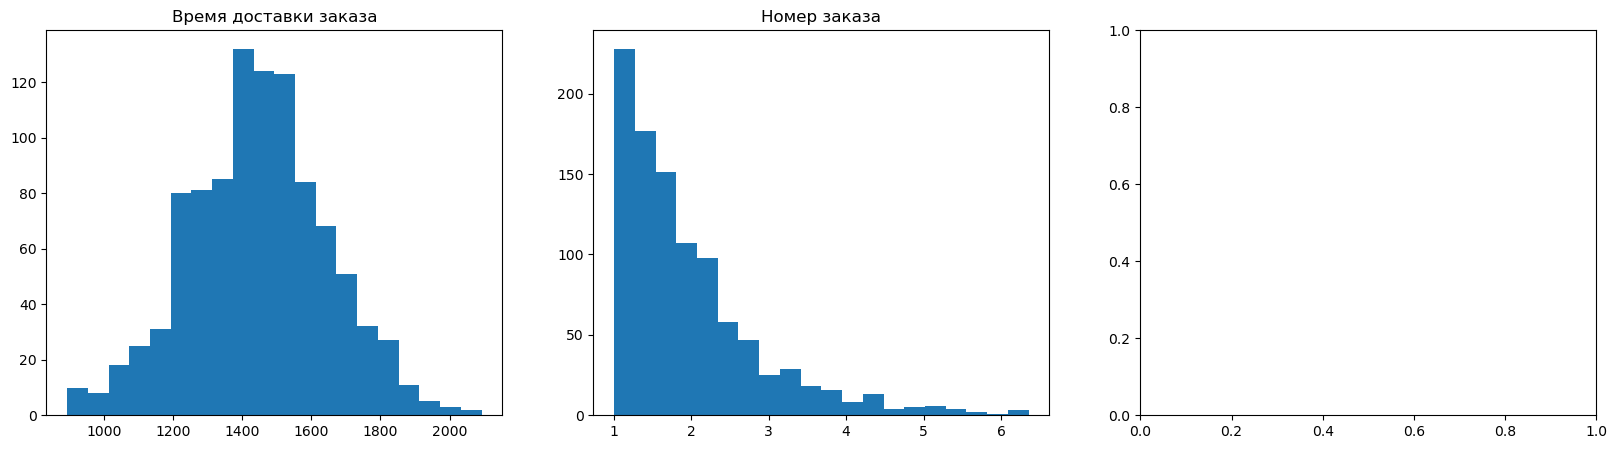

In [153]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

axes[0]=plt.subplot(131)
axes[0].hist(df['click2delivery'], bins=20)
axes[0].set(title='Время доставки заказа')

axes[1]=plt.subplot(132)
axes[1].hist(df['order_items_sum'], bins=20)
axes[1].set(title='Номер заказа')

plt.show()

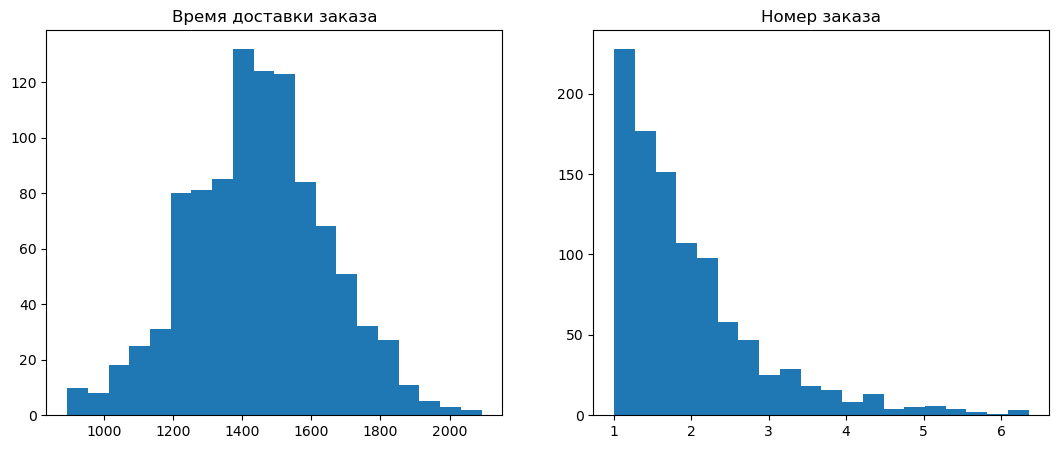

In [154]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(df['click2delivery'], bins=20)
plt.title('Время доставки заказа')

plt.subplot(132)
plt.hist(df['order_items_sum'], bins=20)
plt.title('Номер заказа')

plt.show()

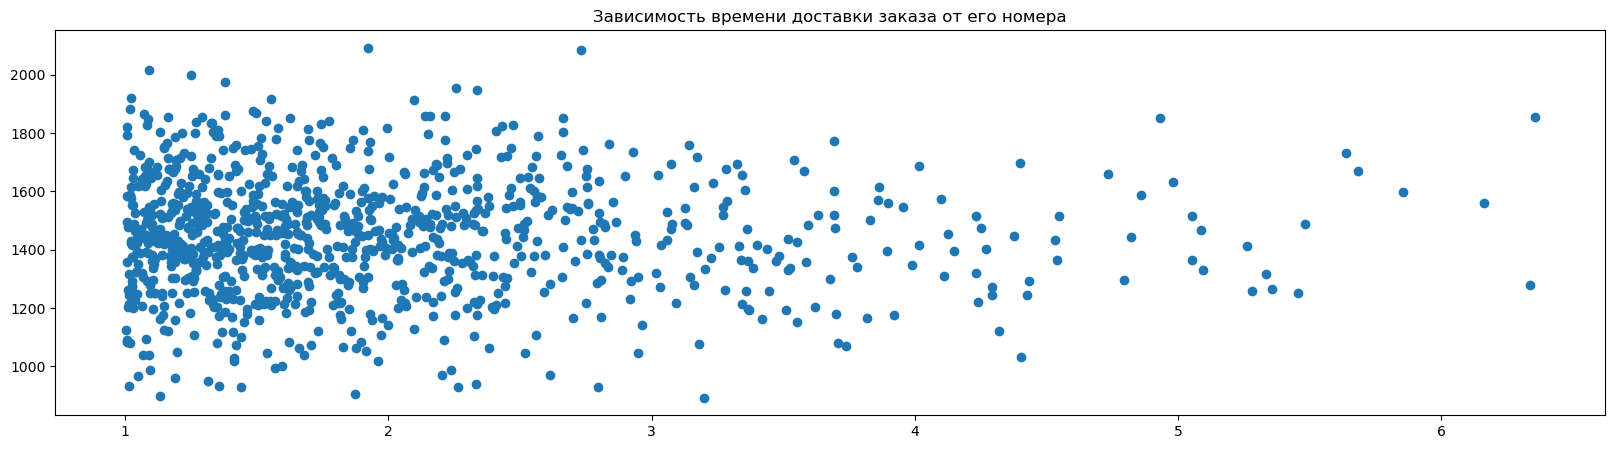

In [160]:
plt.figure(figsize=(20,5))
plt.scatter(df['order_items_sum'],df['click2delivery'])
plt.title('Зависимость времени доставки заказа от его номера')
plt.show()